In [2]:
import pandas as pd

## Read data

FMA repository is [here](https://github.com/mdeff/fma)

- Download the metadata file [here](https://os.unil.cloud.switch.ch/fma/fma_metadata.zip) and unzip to `data-FMA` folder
- `tracks.csv` contains album, name, genre, and tags
- only a portion have complete tag information

## Read FMA tracks subset

In [3]:
filePath = "data-processed/tracks-tags.csv"
df = pd.read_csv(filePath, header=[0,1], index_col=0)
df.head()

artist            album                          track  \
                name            title                          title   
track_id                                                               
137           Airway     Live at LACE                         Side A   
138           Airway     Live at LACE                         Side B   
850       Human Host  Exploding Demon                Tomb Of Science   
851       Human Host  Exploding Demon                     Six Realms   
852       Human Host  Exploding Demon  Escape From the Organ Chamber   

                                                             
             genre_top   genres   genres_all           tags  
track_id                                                     
137       Experimental  [1, 32]  [32, 1, 38]      ['lafms']  
138       Experimental  [1, 32]  [32, 1, 38]      ['lafms']  
850               Rock     [12]         [12]  ['baltimore']  
851               Rock     [12]         [12]  ['baltimore']  
852               Rock     [12]         [12]  ['baltimore']

## Replace or map genre codes with names

ref: pandas [replace](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html#pandas.DataFrame.replace) or [map](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.map.html#pandas.DataFrame.map)

In [4]:
# Read in genres.csv
df_genres = pd.read_csv("data-FMA/genres.csv")
df_genres.head()

genre_id  #tracks  parent          title  top_level
0         1     8693      38    Avant-Garde         38
1         2     5271       0  International          2
2         3     1752       0          Blues          3
3         4     4126       0           Jazz          4
4         5     4106       0      Classical          5

Create a dictionary for mapping code in `tags genre` and `tags genre_all` to genre names

In [5]:
dict_map = {}

for index, row in df_genres.iterrows():
    dict_map[row["genre_id"]] = row["title"]

dict_map

{1: 'Avant-Garde',
 2: 'International',
 3: 'Blues',
 4: 'Jazz',
 5: 'Classical',
 6: 'Novelty',
 7: 'Comedy',
 8: 'Old-Time / Historic',
 9: 'Country',
 10: 'Pop',
 11: 'Disco',
 12: 'Rock',
 13: 'Easy Listening',
 14: 'Soul-RnB',
 15: 'Electronic',
 16: 'Sound Effects',
 17: 'Folk',
 18: 'Soundtrack',
 19: 'Funk',
 20: 'Spoken',
 21: 'Hip-Hop',
 22: 'Audio Collage',
 25: 'Punk',
 26: 'Post-Rock',
 27: 'Lo-Fi',
 30: 'Field Recordings',
 31: 'Metal',
 32: 'Noise',
 33: 'Psych-Folk',
 36: 'Krautrock',
 37: 'Jazz: Vocal',
 38: 'Experimental',
 41: 'Electroacoustic',
 42: 'Ambient Electronic',
 43: 'Radio Art',
 45: 'Loud-Rock',
 46: 'Latin America',
 47: 'Drone',
 49: 'Free-Folk',
 53: 'Noise-Rock',
 58: 'Psych-Rock',
 63: 'Bluegrass',
 64: 'Electro-Punk',
 65: 'Radio',
 66: 'Indie-Rock',
 70: 'Industrial',
 71: 'No Wave',
 74: 'Free-Jazz',
 76: 'Experimental Pop',
 77: 'French',
 79: 'Reggae - Dub',
 81: 'Afrobeat',
 83: 'Nerdcore',
 85: 'Garage',
 86: 'Indian',
 88: 'New Wave',
 89: 'P

## Parse the cells in the track-tags column

ref: python [strings](https://docs.python.org/3/library/string.html#module-string) and the [re](https://docs.python.org/3/library/re.html#module-re) package

- practice re [here](https://regex101.com)

Create a dataframe with only track id and genre information:

Create function to split number string in genre column to individual substrings:

In [6]:
def split_numbers(input_string):
    # separate out just the numbers
    genre_code_list = input_string.strip("[]").split(",")
    # Map numbers in list to genre word (for..in)
    newList = [ ]

    for x in genre_code_list:
        # The original function was giving an error because of empty genre values in the dataframe
        #   e.g., int(x) cannot conver 'no value' to a number, so python gives an error
        #   The 'try--except' code in python lets you try to compute int(x), and if it give an error, 
        #           (see: https://pythonbasics.org/try-except/)
        #   then run some other code. So here, we try int(x), if it give an error, then return empty string
        try:
            r = dict_map[int(x)]   # r = the mapping at int(x)
        except ValueError:         # if int(x) fails with 'ValueError'
            r = ""                 # just make an empty string
        newList.append(r)
    return newList   # Return list for exploding later...
    #return ", ".join(newList)   # alternatively, rejoin into a string (so it fits in dataframe column)

# Test
# Input string
input_string = "[1, 5, 9, ]"

# Call the split_numbers function
result = split_numbers(input_string)

# Print the result
print(result)

['Avant-Garde', 'Classical', 'Country', '']


In [7]:
# Test pandas map()
data = {'column': ['[9, 10, 11]']}
df_test = pd.DataFrame(data)
df_test["column"].map(split_numbers)

0    [Country, Pop, Disco]
Name: column, dtype: object

Map the split numbers function to track id and genre dataframe:

**Note:** We will eventually want to analyzie the datafram with both tags and genre, so it makes sense to modify the columns int he original dataframe. 

The datafram isn't too big, see we can make a second copy (if you want to see the difference between origianl and modified.)

Since we have the map function written, we can run it on both genre columns.

In [8]:
df2 = df.copy() # use .copy() so df2 is actually separate from the original df (otherwise, 
                #    df2 acts like a 'link' to df, and changing df2 changes df as well :/)
df2[('track', 'genres')] = df2.loc[:, ('track', 'genres')].map(split_numbers)
df2[('track', 'genres_all')] = df2.loc[:, ('track', 'genres_all')].map(split_numbers)
df2[('track', 'tags')] = df2.loc[:, ('track', 'tags')].str.replace(r"\[|\]|'", "", regex=True).str.split(",") # clean up the tags
     #  Also, convert these values to a list for exploding later
df2.head()

artist            album                          track  \
                name            title                          title   
track_id                                                               
137           Airway     Live at LACE                         Side A   
138           Airway     Live at LACE                         Side B   
850       Human Host  Exploding Demon                Tomb Of Science   
851       Human Host  Exploding Demon                     Six Realms   
852       Human Host  Exploding Demon  Escape From the Organ Chamber   

                                              \
             genre_top                genres   
track_id                                       
137       Experimental  [Avant-Garde, Noise]   
138       Experimental  [Avant-Garde, Noise]   
850               Rock                [Rock]   
851               Rock                [Rock]   
852               Rock                [Rock]   

                                                           
                                  genres_all         tags  
track_id                                                   
137       [Noise, Avant-Garde, Experimental]      [lafms]  
138       [Noise, Avant-Garde, Experimental]      [lafms]  
850                                   [Rock]  [baltimore]  
851                                   [Rock]  [baltimore]  
852                                   [Rock]  [baltimore]

Create new dataframe with genre_word and track_id columns:

Group by genre words:

## Word frequency

### Tag (or genre) frequency

First filter by `track genres` then unnest tokens

pandas [Explode](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.explode.html) converts lists within a column to rows (kind of like wide to long based on a column list)

- we do this twice, separately, to unlist all of the genres and tags
- (verify this is correct?)

In [45]:
df_genrecount = df2.explode(('track', 'genres'))
df_genrecount.head()

artist            album            track                \
                name            title            title     genre_top   
track_id                                                               
137           Airway     Live at LACE           Side A  Experimental   
137           Airway     Live at LACE           Side A  Experimental   
138           Airway     Live at LACE           Side B  Experimental   
138           Airway     Live at LACE           Side B  Experimental   
850       Human Host  Exploding Demon  Tomb Of Science          Rock   

                                                                        
               genres                          genres_all         tags  
track_id                                                                
137       Avant-Garde  [Noise, Avant-Garde, Experimental]      [lafms]  
137             Noise  [Noise, Avant-Garde, Experimental]      [lafms]  
138       Avant-Garde  [Noise, Avant-Garde, Experimental]      [lafms]  
138             Noise  [Noise, Avant-Garde, Experimental]      [lafms]  
850              Rock                              [Rock]  [baltimore]

In [46]:
counts = df_genrecount.groupby(('track', 'genres')).size()

print(counts)

(track, genres)
                          457
20th Century Classical    140
Abstract Hip-Hop           40
African                    53
Afrobeat                   14
                         ... 
Thrash                     35
Trip-Hop                  248
Turkish                     5
Unclassifiable            385
Wonky                      26
Length: 153, dtype: int64


In [44]:
df_tmp = df2.explode(('track', 'genres')).explode(('track', 'tags'))
df_tmp.head()

artist            album            track                \
                name            title            title     genre_top   
track_id                                                               
137           Airway     Live at LACE           Side A  Experimental   
137           Airway     Live at LACE           Side A  Experimental   
138           Airway     Live at LACE           Side B  Experimental   
138           Airway     Live at LACE           Side B  Experimental   
850       Human Host  Exploding Demon  Tomb Of Science          Rock   

                                                                      
               genres                          genres_all       tags  
track_id                                                              
137       Avant-Garde  [Noise, Avant-Garde, Experimental]      lafms  
137             Noise  [Noise, Avant-Garde, Experimental]      lafms  
138       Avant-Garde  [Noise, Avant-Garde, Experimental]      lafms  
138             Noise  [Noise, Avant-Garde, Experimental]      lafms  
850              Rock                              [Rock]  baltimore

Note: groupby() produces a dictionary where keys are the groups (genres) and values are the corresponing index of the main dataframe

In [10]:
groupby_genre = df2.explode(('track', 'genres')).explode(('track', 'tags')).groupby(('track', 'genres'))
len(groupby_genre) # 153 genre groups
# groupby_genre.groups # shows group keys and and row values

153

The dataframe now has a multiindex index column, the first level being genre, the second level is tag, the values in the columns are the counts of each genre--tag combination

In [11]:
genre_tag_counts = df2.explode(('track', 'genres')).explode(('track', 'tags')).groupby([('track', 'genres'), ('track', 'tags')]).count()

In [12]:
genre_tag_counts.index.get_level_values(0).unique() # see the unique level 0 index (genres)

Index(['', '20th Century Classical', 'Abstract Hip-Hop', 'African', 'Afrobeat',
       'Alternative Hip-Hop', 'Ambient', 'Ambient Electronic', 'Americana',
       'Asia-Far East',
       ...
       'Surf', 'Symphony', 'Synth Pop', 'Tango', 'Techno', 'Thrash',
       'Trip-Hop', 'Turkish', 'Unclassifiable', 'Wonky'],
      dtype='object', name=('track', 'genres'), length=153)

In [13]:
genre_tag_counts.index.get_level_values(1).unique() # see the unique level 1 index (tags)

Index([' 2013', ' abstract', ' abstract electronic', ' acoustic',
       ' acoustic blues', ' acustronica', ' adventure', ' aerial',
       ' allentown', ' alternative',
       ...
       ' the craters', '80s', 'earth-enemy', 'human resources',
       'monroeville music center', 'tango', ' cellar dweller',
       ' sheffield techno', 'planet terror records', 'techstep'],
      dtype='object', name=('track', 'tags'), length=5708)

## Analyze by genre

In [14]:
genre_tag_counts.loc["Classical"] # This will select all in index with single genre

artist album track                     
                            name title title genre_top genres_all
(track, tags)                                                    
 20th century composition     29    29    29         9         29
 21st century composition     16    16    16         0         16
 45 echoes sounds              3     3     3         0          3
 abstract                     15    15    15         0         15
 absurd                        3     3     3         0          3
...                          ...   ...   ...       ...        ...
tosti                         20    20    20        20         20
tracks to sync                38    38    38        16         38
wall matthews                  8     8     8         0          8
weber                         23    23    23         0         23
wmfu                           3     3     3         0          3

[549 rows x 5 columns]

## Analyze by tag

In [15]:
genre_tag_counts.xs("abstract", level=1) # slightly different method of selection
# retruns all genres that use the 'ambiant tag'

artist album track                     
                   name title title genre_top genres_all
(track, genres)                                         
Ambient               9     9     9         0          9
Avant-Garde          29    29    29        14         29
Drone                 9     9     9         0          9
Electroacoustic      14    14    14        14         14
Electronic            4     4     4         0          4
Experimental         33    33    33        14         33
Field Recordings      9     9     9         0          9
Free-Jazz            15    15    15         0         15
IDM                   4     4     4         0          4
Instrumental          4     4     4         0          4
Jazz                 15    15    15         0         15
Musique Concrete     14    14    14        14         14

## Plotting results

Try [matplotlib](https://matplotlib.org/stable/plot_types/index.html) or [seaborn](https://seaborn.pydata.org/examples/index.html) or [plotly](https://plotly.com/python/)...?

- install with conda if needed

In [16]:
import matplotlib.pyplot as plt

<Axes: xlabel='(track, tags)'>

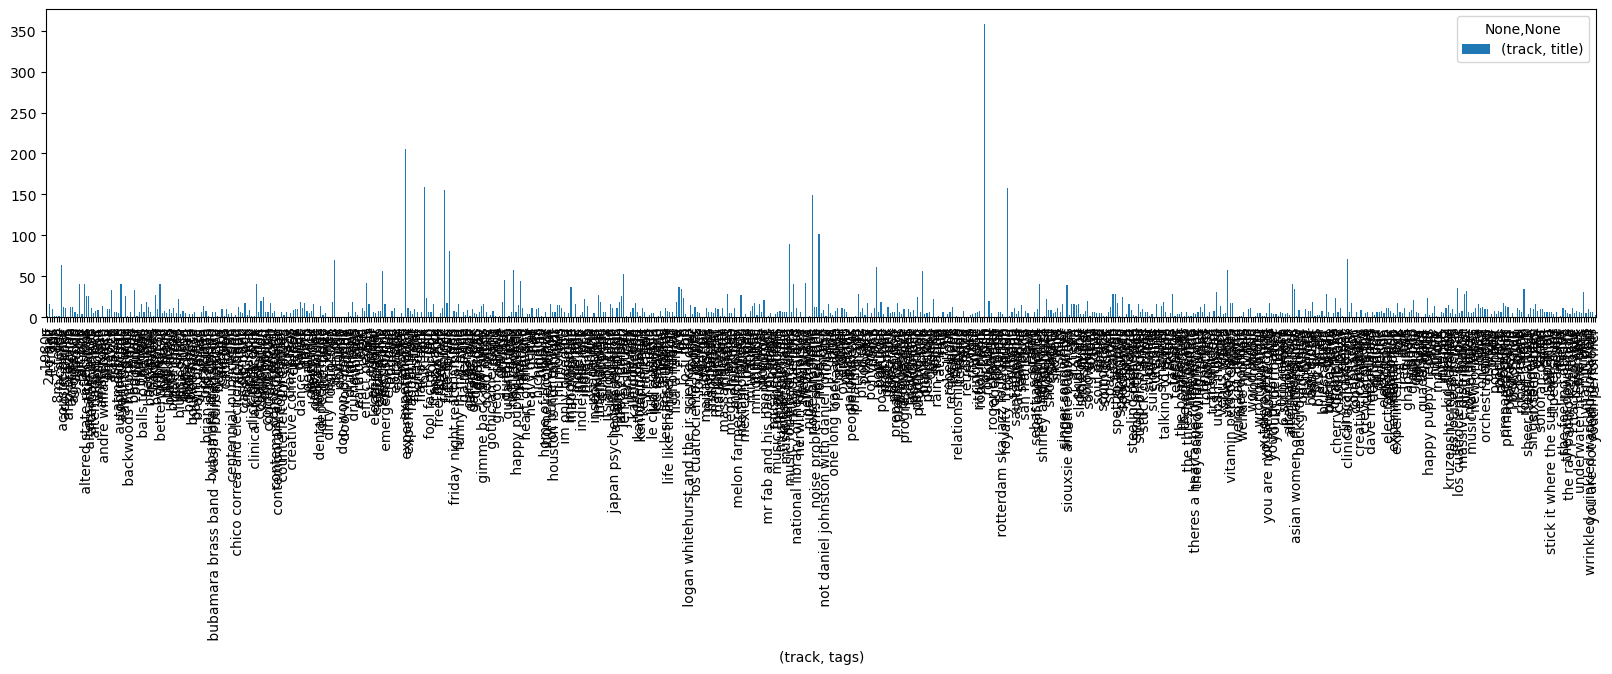

In [17]:
genre_tag_counts.xs("Rock", level=0).plot.bar(y=('track', 'title'), figsize=(20, 4))

This is difficult to read, maybe just pick the top tags...

<Axes: xlabel='(track, tags)'>

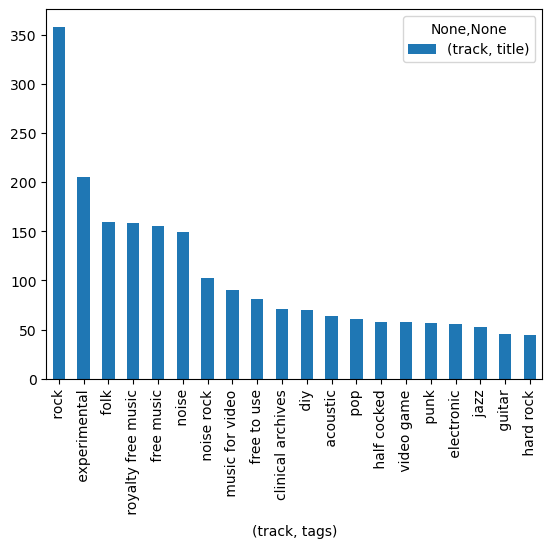

In [18]:
(genre_tag_counts
 .xs("Rock", level=0)
 .nlargest(20, ('track', 'title'), keep="all")
 .plot.bar(y=('track', 'title')))

<Axes: xlabel='(track, genres)'>

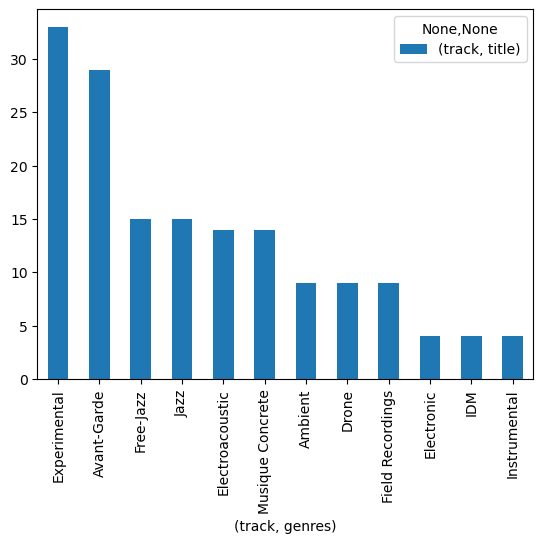

In [19]:
(genre_tag_counts
 .xs("abstract", level=1)
 .sort_values(by=('track', 'title'), ascending=False)
 .plot.bar(y=('track', 'title')))

Selected 10 Genres for inclusion: Rock, Electronic, Hip-hop, Folk, Pop, Classical, Jazz, Country, Soul-RnB, Blues

<Axes: xlabel='(track, tags)'>

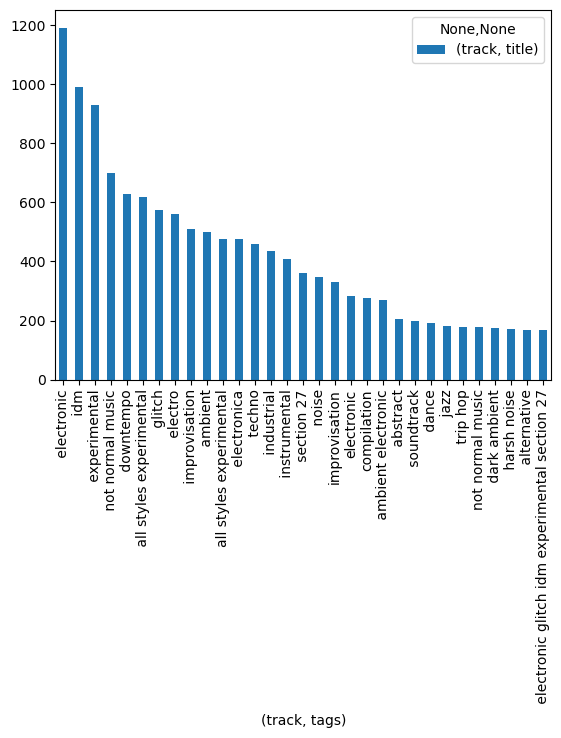

In [20]:
(genre_tag_counts
 .xs("Electronic", level=0)
 .nlargest(30, ('track', 'title'), keep="all")
 .plot.bar(y=('track', 'title')))

<Axes: xlabel='(track, tags)'>

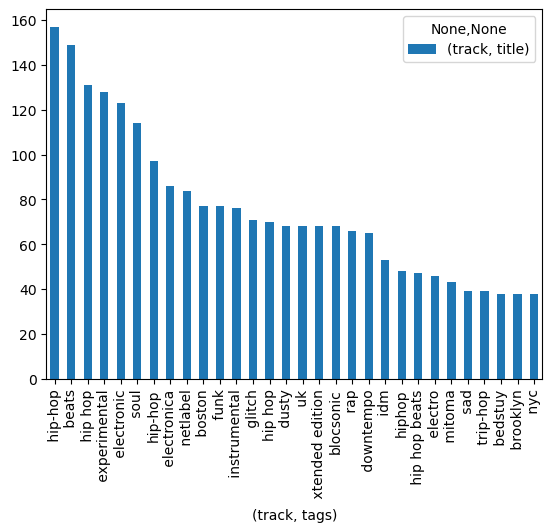

In [21]:
(genre_tag_counts
 .xs("Hip-Hop", level=0)
 .nlargest(30, ('track', 'title'), keep="all")
 .plot.bar(y=('track', 'title')))

<Axes: xlabel='(track, tags)'>

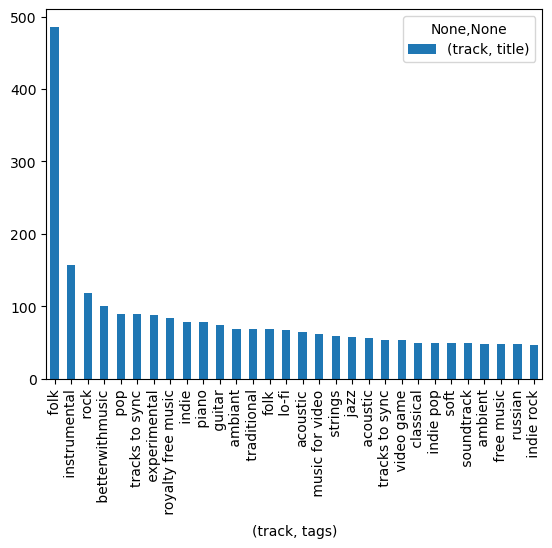

In [22]:
(genre_tag_counts
 .xs("Folk", level=0)
 .nlargest(30, ('track', 'title'), keep="all")
 .plot.bar(y=('track', 'title')))

<Axes: xlabel='(track, tags)'>

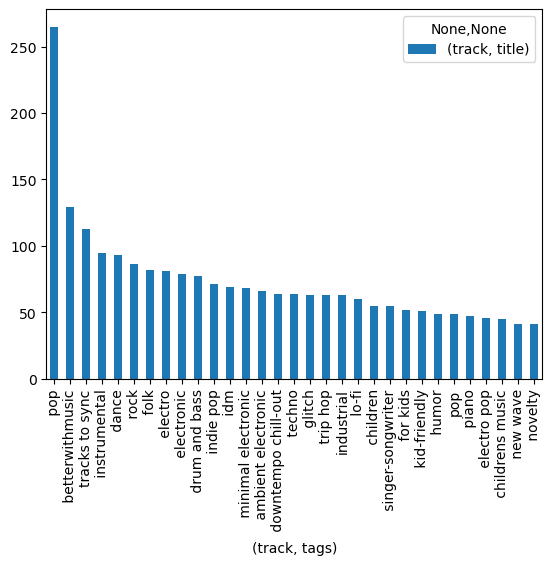

In [23]:
(genre_tag_counts
 .xs("Pop", level=0)
 .nlargest(30, ('track', 'title'), keep="all")
 .plot.bar(y=('track', 'title')))

<Axes: xlabel='(track, tags)'>

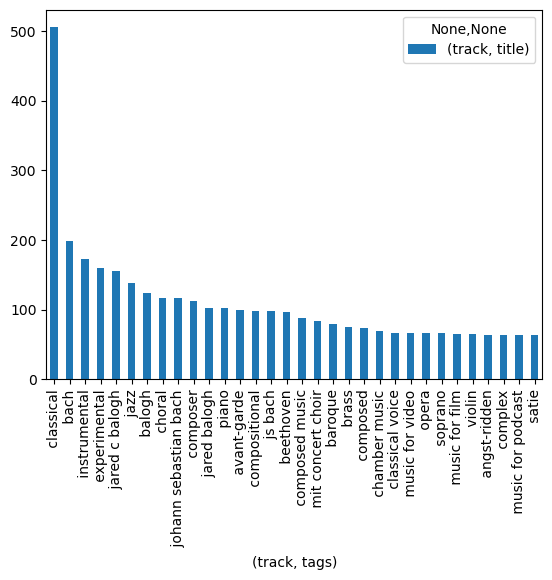

In [24]:
(genre_tag_counts
 .xs("Classical", level=0)
 .nlargest(30, ('track', 'title'), keep="all")
 .plot.bar(y=('track', 'title')))

<Axes: xlabel='(track, tags)'>

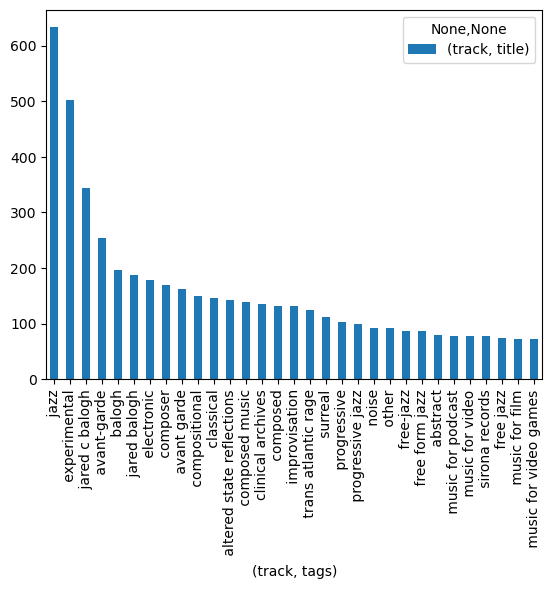

In [25]:
(genre_tag_counts
 .xs("Jazz", level=0)
 .nlargest(30, ('track', 'title'), keep="all")
 .plot.bar(y=('track', 'title')))

<Axes: xlabel='(track, tags)'>

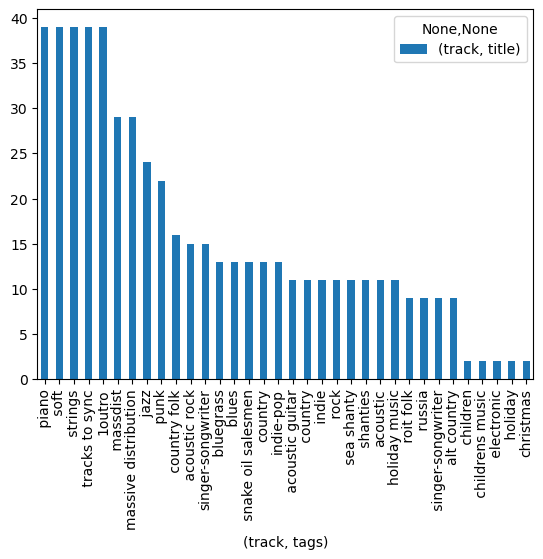

In [26]:
(genre_tag_counts
 .xs("Country", level=0)
 .nlargest(30, ('track', 'title'), keep="all")
 .plot.bar(y=('track', 'title')))

<Axes: xlabel='(track, tags)'>

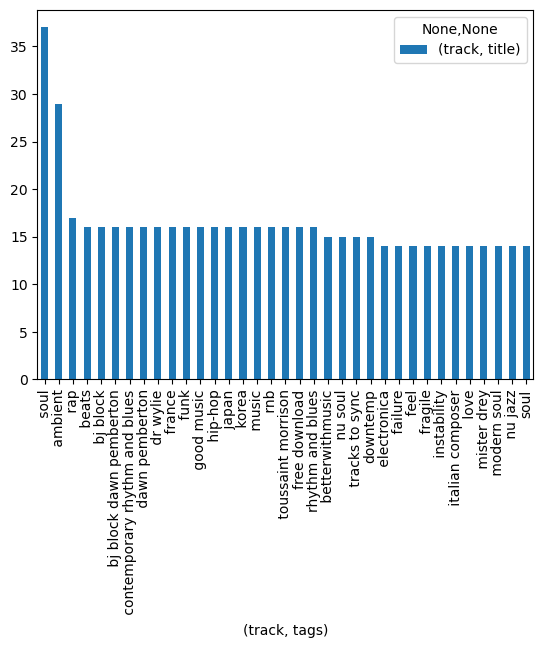

In [27]:
(genre_tag_counts
 .xs("Soul-RnB", level=0)
 .nlargest(30, ('track', 'title'), keep="all")
 .plot.bar(y=('track', 'title')))

<Axes: xlabel='(track, tags)'>

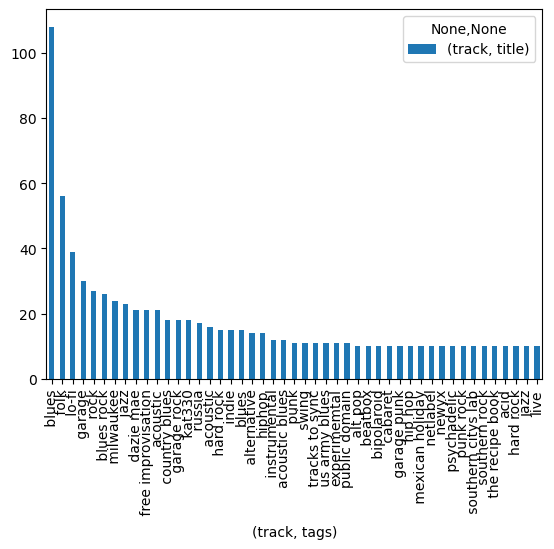

In [28]:
(genre_tag_counts
 .xs("Blues", level=0)
 .nlargest(30, ('track', 'title'), keep="all")
 .plot.bar(y=('track', 'title')))

## Plots

Define psychological attributes and genres of interest:

In [29]:
psychological_attributes = ['Intense', 'Tense', 'Forceful', 'Aggressive', 'Angry', 'Abrasive', 'Strong', 'Mellow', 'Thrilling', 'Gentle', 'Manic', 'Calming', 'Warm', 'Reflective', 'Relaxing', 'Romantic', 'Sensual', 'Happy', 'Fun', 'Depressing', 'Merry', 'Joyful', 'Enthusiastic', 'Lively', 'Animated', 'Amusing', 'Sad', 'Intelligent', 'Sophisticated', 'Inspiring', 'Complex', 'Poetic', 'Deep', 'Dreamy', 'Thoughtful', 'Party Music', 'Emotional', 'Danceable']
genres = ['Electronic', 'Classical', 'Rock', 'Pop', 'Country', 'Folk', 'Hip-Hop', 'Jazz', 'Blues', 'Soul-RnB']

print(psychological_attributes)
print(genres)

['Intense', 'Tense', 'Forceful', 'Aggressive', 'Angry', 'Abrasive', 'Strong', 'Mellow', 'Thrilling', 'Gentle', 'Manic', 'Calming', 'Warm', 'Reflective', 'Relaxing', 'Romantic', 'Sensual', 'Happy', 'Fun', 'Depressing', 'Merry', 'Joyful', 'Enthusiastic', 'Lively', 'Animated', 'Amusing', 'Sad', 'Intelligent', 'Sophisticated', 'Inspiring', 'Complex', 'Poetic', 'Deep', 'Dreamy', 'Thoughtful', 'Party Music', 'Emotional', 'Danceable']
['Electronic', 'Classical', 'Rock', 'Pop', 'Country', 'Folk', 'Hip-Hop', 'Jazz', 'Blues', 'Soul-RnB']


Get tag counts

In [30]:
# this returns a dataframe
genre_tag_counts = df2.explode(('track', 'genres')).explode(('track', 'tags')).groupby([('track', 'genres'), ('track', 'tags')]).count()
genre_tag_counts.reset_index(inplace=True)
#genre_tag_counts.head()


In [31]:
genre_tag_counts.head()

track                       artist album track                     
  genres                  tags   name title title genre_top genres_all
0                         2013     19    19    19         0         19
1                     abstract      1     1     1         0          1
2          abstract electronic      1     1     1         0          1
3                     acoustic      3     3     3         0          3
4               acoustic blues      1     1     1         0          1

Filter rows that contain genres/attributes and select only columns needed for plot

**TODO:** you might can filter unwanted tags with **-** (minus):

```
df = df[-df[('track', 'tags')].isin(['word1', 'word2', 'etc...'])]
```

or

```
exclude_words = ['word1', 'word2', 'etc...']
df = df[-df[('track', 'tags')]].isin(exclude_words)
```

I started with a few by looking at the plot below and finding words that did not seem relevant...

In [32]:
df = genre_tag_counts[genre_tag_counts[('track', 'genres')].isin(genres)][[('track', 'genres'), ('track', 'tags'), ('track', 'title')]]

n_full = len(df)

# Filter unwanted tags here:
exclude_words = [
    '2013', 'balogh', 'jared c balogh', 'free music', 'bj block', 'betterwithmusic', 
    '1outro', 'tracks to sync', 'massdist', 'jared balogh', 'milwaukee', 'dazie mae',
    'bach', 'royalty free music', 'bj block dawn pemberton', 'johann sebastian bach',
    'composer', 'massive distribution', 'compositional', 'music for video', 'free to use',
    'clinical archives', 'all styles experimental', 'dawn pemberton', 'dr wylie'
]

# Strip spaces from tags first
df[('track', 'tags')] = df[('track', 'tags')].apply(lambda x: x.strip())

df = df[~df[('track', 'tags')].isin(exclude_words + [i.lower() for i in genres])]
len(df)

n_exclude = len(df)

print(f'Excluded {n_full - n_exclude} tags')

# Line below would also select psychological attributes, but this produces no results :(
#df = genre_tag_counts[genre_tag_counts[('track', 'genres')].isin(genres) & genre_tag_counts[('track', 'tags')].isin(psychological_attributes)][[('track', 'genres'), ('track', 'tags'), ('track', 'title')]]

# Simplify column names
df.columns = df.columns.get_level_values(1)

# ..then find the top 5 for each genre
df = df.groupby('genres').apply(lambda x: x.nlargest(5,['title'])).reset_index(drop=True)

# Add 'parents' to each genre (for sunburst to work) **Not used!
genre_totals = df.groupby('genres').count()
df_parent = pd.DataFrame({
    'genres': "",
    'tags': genre_totals.index.values,
    'title': genre_totals['title'].values
})
#df = pd.concat([df_parent, df])
df['size'] = 1 # Use this to make sunburst equal for each tag, we'll use color to show frequency
with pd.option_context('display.max_rows', None):
    print(df)

Excluded 216 tags
        genres                           tags  title  size
0        Blues                          lo-fi     39     1
1        Blues                         garage     30     1
2        Blues                     blues rock     26     1
3        Blues             free improvisation     21     1
4        Blues                       acoustic     21     1
5    Classical                   instrumental    173     1
6    Classical                   experimental    160     1
7    Classical                         choral    117     1
8    Classical                          piano    103     1
9    Classical                    avant-garde     99     1
10     Country                          piano     39     1
11     Country                           soft     39     1
12     Country                        strings     39     1
13     Country                           punk     22     1
14     Country                   country folk     16     1
15  Electronic                        

C:\Users\cath\AppData\Local\Temp\ipykernel_4032\996527624.py:31: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('genres').apply(lambda x: x.nlargest(5,['title'])).reset_index(drop=True)


To save images as files that you can import to powerpoint, activate your environment (in anaconda prompt) and install either (you only need one):

- conda install -c conda-forge python-kaleido
- pip install -U kaleido

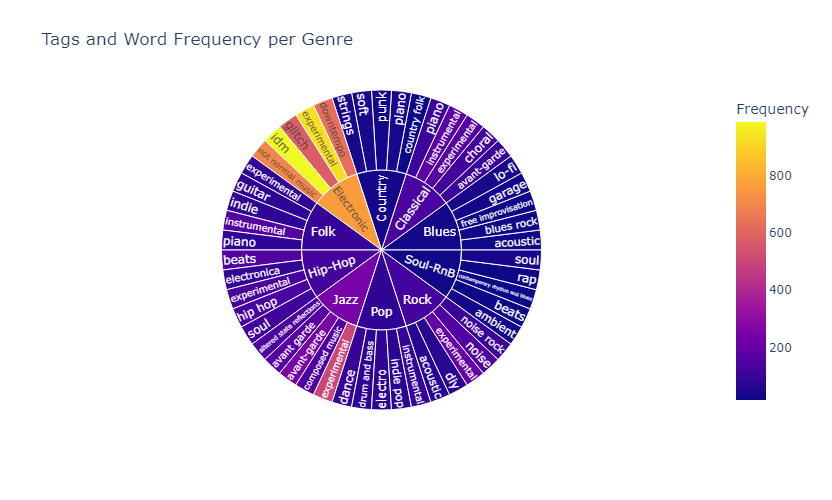

In [33]:
import plotly.express as px
fig = px.sunburst(
    df,
    path=['genres', 'tags'],
    values='size',
    color='title',
    title="Tags and Word Frequency per Genre",
    labels= {"title":"Frequency"}
)

fig.update_layout(
    autosize=False,
    width=550,
    height=500,
    margin=dict(
        l=50,
        r=40,
        b=90,
        t=90,
        pad=4
    ))

fig.show()
## make sure to: conda install -c conda-forge python-kaleido

# png's open nicely on your desktop, but you'll need to play with 
#  width/height/scale to size it properly for powerpoint...
fig.write_image("genres.png", width=1000, height=1000, scale=2)

# svg's might not open on your desktop, but should import into 
#  powerpoint and scale nicely
fig.write_image("genres.svg")